In [6]:
import numpy as np
import math
import random
from random import seed
from random import random
from numpy import linalg as LA
import scipy.linalg.interpolative
import random
import matplotlib.pyplot as plt

In [7]:
def hard_thresh(x_mat,s):  # function for hard thresholding
    n=len(x_mat)
    val=[]
    
    x_mat_temp=np.array
    x_mat_temp=np.absolute(x_mat)
    ind=x_mat_temp.argsort(axis=0)
    
    val=ind[-s:]
    
    for i in range(n):
        if i not in val:
            x_mat[i]=0
        
             
    return(x_mat)

In [8]:
def iht_algo (A,y,s,h,max_iter,tol,xn,x,N):
    iteration=0
     
    
    rel_incr=10
    
    
    xn1=np.zeros((N,1))  
    
  #  while LA.norm(A,2)<1:
    while iteration<max_iter and rel_incr>tol:
        A_tol=A.transpose()
        xn1=xn+(h*(A_tol.dot((y-(A.dot(xn))))))
        xn1=hard_thresh(xn1,s)
        rel_incr=LA.norm(xn1-xn)/LA.norm(xn1)
        xn=xn1
           
    return xn

In [13]:
def phase_transition(N,s,N_mc):
    prob=[]
    m_val=[]
    for m in range (20,200,20):
        succ=0
        m_val.append(m)
        for iter_mc in range(N_mc):
            A=np.random.randn(m,N) # measurement matrix
            x =np.zeros((N,1))
            a=LA.norm(A,2)
            A=A/(a)
            import random
            randomlist = random.sample(range(0, N-1), s) # indeces for non zero values
            from random import random
        
            for i in randomlist:
                x[i]=random()  

            y=A.dot(x)  

            xn=np.zeros((N,1))
            #xn1=np.zeros((N,1)) #xn+1



            xnplus1=iht_algo(A,y,s,1,100,1e-8,xn,x,N)
        
            if (LA.norm((x-xnplus1),2)/LA.norm(x,2))<1e-3:
                succ=succ+1

        prob.append(succ/N_mc)
        plt.plot(m_val,prob)
        plt.xlabel('m')
        plt.ylabel('recovery probability ')

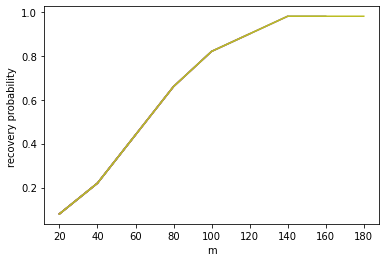

In [14]:
phase_transition(200,5,50)

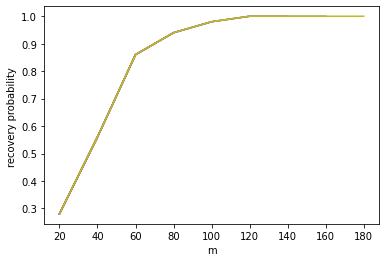

In [15]:
phase_transition(200,2,50)

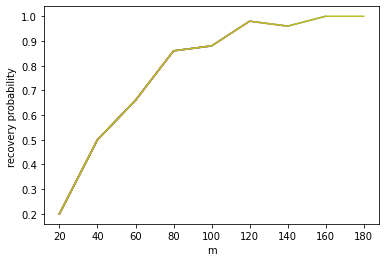

In [16]:
phase_transition(200,3,50)

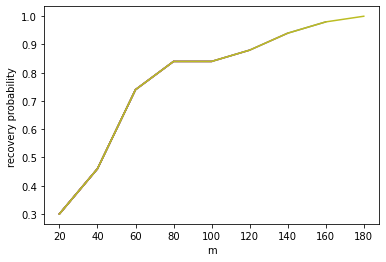

In [17]:
phase_transition(400,2,50)

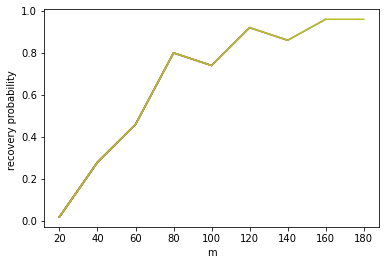

In [19]:
phase_transition(400,3,50)

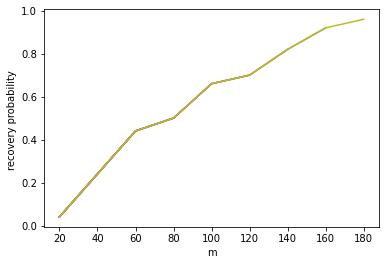

In [20]:
phase_transition(400,4,50)

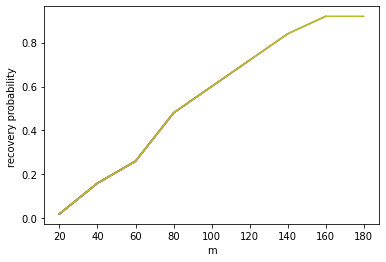

In [21]:
phase_transition(400,5,50)

In [25]:
def phase_transition_mvals(N,m,s,N_mc):
    prob=[]
    m_val=[]
    for m in range (20,m,20):
        succ=0
        m_val.append(m)
        for iter_mc in range(N_mc):
            A=np.random.randn(m,N) # measurement matrix
            x =np.zeros((N,1))
            a=LA.norm(A,2)
            A=A/(a)
            import random
            randomlist = random.sample(range(0, N-1), s) # indeces for non zero values
            from random import random
        
            for i in randomlist:
                x[i]=random()  

            y=A.dot(x)  

            xn=np.zeros((N,1))
            #xn1=np.zeros((N,1)) #xn+1



            xnplus1=iht_algo(A,y,s,1,100,1e-8,xn,x,N)
        
            if (LA.norm((x-xnplus1),2)/LA.norm(x,2))<1e-3:
                succ=succ+1

        prob.append(succ/N_mc)
        plt.plot(m_val,prob)
        plt.xlabel('m')
        plt.ylabel('recovery probability ')

In [ ]:
phase_transition_mvals(1000,500,2,50)